In [43]:
# data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt
from datetime import datetime
import tensorflow.keras as keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from problems.time_series.common import plot_series
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('./data/Sunspots.csv', parse_dates=['Date'])
df.columns = ['date index', 'date', 'spots number']
df.head()

,date index,date,spots number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [15]:
df = df[['date', 'spots number']]
df.head()

,date,spots number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [16]:
df.isnull().sum()

date            0
spots number    0
dtype: int64

In [17]:
df.dtypes

date            datetime64[ns]
spots number           float64
dtype: object

In [64]:
data = df['spots number'].values.reshape(-1, 1)
time = df['date'].values

In [110]:
split_time = 3000
window_size = 50
training_set = data[0:split_time]
training_time = time[0:split_time]

testing_set = data[split_time - window_size:]
testing_time = time[split_time - window_size:]

In [111]:
testing_set

array([[2.950e+01],
       [3.220e+01],
       [3.260e+01],
       [4.580e+01],
       [4.630e+01],
       [2.160e+01],
       [1.940e+01],
       [2.250e+01],
       [2.040e+01],
       [1.820e+01],
       [1.570e+01],
       [3.060e+01],
       [1.400e+01],
       [1.490e+01],
       [1.330e+01],
       [7.700e+00],
       [1.260e+01],
       [6.800e+00],
       [7.600e+00],
       [1.650e+01],
       [1.180e+01],
       [1.970e+01],
       [3.000e+00],
       [7.000e-01],
       [2.490e+01],
       [1.400e+01],
       [7.400e+00],
       [1.100e+01],
       [1.210e+01],
       [2.300e+01],
       [2.540e+01],
       [2.080e+01],
       [1.290e+01],
       [3.570e+01],
       [5.970e+01],
       [3.280e+01],
       [5.040e+01],
       [5.550e+01],
       [4.450e+01],
       [5.020e+01],
       [8.200e+01],
       [7.060e+01],
       [7.400e+01],
       [9.050e+01],
       [9.670e+01],
       [1.211e+02],
       [1.320e+02],
       [7.850e+01],
       [9.730e+01],
       [1.192e+02],


In [112]:
training_set

array([[ 96.7],
       [104.3],
       [116.7],
       ...,
       [ 78.5],
       [ 97.3],
       [119.2]])

In [113]:
# Feature Scaling
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.transform(testing_set)

In [114]:
training_set_scaled

array([[ 0.19723717],
       [ 0.30832925],
       [ 0.48958475],
       ...,
       [-0.06879913],
       [ 0.2060076 ],
       [ 0.5261282 ]])

In [85]:
testing_set_scaled

array([[ 0.04083121],
       [ 0.21623976],
       [ 0.29663535],
       [ 0.15192329],
       [ 0.97049652],
       [ 1.81245755],
       [ 1.31985188],
       [ 0.86378965],
       [ 0.33756401],
       [ 1.24968846],
       [ 1.53618909],
       [ 0.49104649],
       [ 0.72930977],
       [ 1.20583632],
       [ 1.96594003],
       [ 1.5829647 ],
       [ 1.2087598 ],
       [ 1.53180388],
       [ 2.35476232],
       [ 1.42217353],
       [ 1.06404775],
       [ 0.85355749],
       [ 1.09474424],
       [ 0.87840703],
       [ 0.86817487],
       [ 0.55974817],
       [ 1.20729806],
       [ 1.14736681],
       [ 0.86086618],
       [ 1.74960282],
       [ 0.58167424],
       [ 1.14444333],
       [ 2.2655963 ],
       [ 1.62096989],
       [ 1.36516575],
       [ 1.9030853 ],
       [ 1.48210479],
       [ 1.27161453],
       [ 0.93395307],
       [ 1.51572476],
       [ 1.52449519],
       [ 0.66645504],
       [ 1.13713464],
       [ 1.35054838],
       [ 1.53034214],
       [ 0

In [25]:
X = []
y = []
for i in range(0, len(training_set_scaled) - window_size):
    X.append(training_set_scaled[i: i + window_size])
    y.append(training_set_scaled[i + window_size])

X, y = np.array(X), np.array(y)

In [14]:
print(X.shape)

(2950, 50, 1)


In [128]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1),
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10 ** (epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

In [129]:
history = model.fit(X, y, epochs=100, validation_split=0.2, callbacks=[lr_schedule])

Epoch 1/100
74/74 [==============================] - 4s 16ms/step - loss: 11.3223 - mse: 210.8809 - val_loss: 8.7456 - val_mse: 121.6205 - lr: 1.0000e-08
Epoch 2/100
74/74 [==============================] - 1s 9ms/step - loss: 10.5322 - mse: 187.6227 - val_loss: 7.9321 - val_mse: 104.7476 - lr: 1.1220e-08
Epoch 3/100
74/74 [==============================] - 1s 8ms/step - loss: 10.0722 - mse: 173.7738 - val_loss: 7.1557 - val_mse: 88.7694 - lr: 1.2589e-08
Epoch 4/100
74/74 [==============================] - 1s 7ms/step - loss: 9.1433 - mse: 148.0798 - val_loss: 6.4328 - val_mse: 74.1556 - lr: 1.4125e-08
Epoch 5/100
74/74 [==============================] - 1s 7ms/step - loss: 8.4799 - mse: 131.5371 - val_loss: 5.7948 - val_mse: 61.5946 - lr: 1.5849e-08
Epoch 6/100
74/74 [==============================] - 1s 9ms/step - loss: 8.0469 - mse: 115.1756 - val_loss: 5.2670 - val_mse: 51.3271 - lr: 1.7783e-08
Epoch 7/100
74/74 [==============================] - 1s 7ms/step - loss: 7.4687 - mse: 1

(1e-08, 0.0001, 0.0, 30.0)

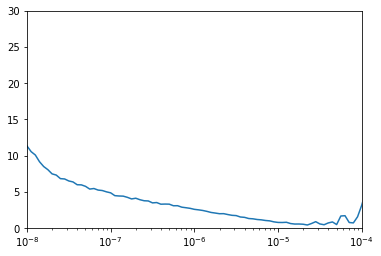

In [130]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [89]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

In [90]:
history = model.fit(X, y, epochs=500, validation_split=0.2)

Epoch 1/500
74/74 [==============================] - 4s 17ms/step - loss: 0.4236 - mae: 0.8118 - val_loss: 0.5696 - val_mae: 0.9842
Epoch 2/500
74/74 [==============================] - 1s 8ms/step - loss: 0.4204 - mae: 0.8079 - val_loss: 0.5679 - val_mae: 0.9821
Epoch 3/500
74/74 [==============================] - 1s 8ms/step - loss: 0.4180 - mae: 0.8053 - val_loss: 0.5663 - val_mae: 0.9799
Epoch 4/500
74/74 [==============================] - 1s 8ms/step - loss: 0.4164 - mae: 0.8035 - val_loss: 0.5647 - val_mae: 0.9778
Epoch 5/500
74/74 [==============================] - 1s 8ms/step - loss: 0.4139 - mae: 0.8003 - val_loss: 0.5630 - val_mae: 0.9757
Epoch 6/500
74/74 [==============================] - 1s 8ms/step - loss: 0.4123 - mae: 0.7984 - val_loss: 0.5614 - val_mae: 0.9736
Epoch 7/500
74/74 [==============================] - 1s 8ms/step - loss: 0.4089 - mae: 0.7946 - val_loss: 0.5599 - val_mae: 0.9716
Epoch 8/500
74/74 [==============================] - 1s 8ms/step - loss: 0.4073 - 

<Figure size 432x288 with 0 Axes>

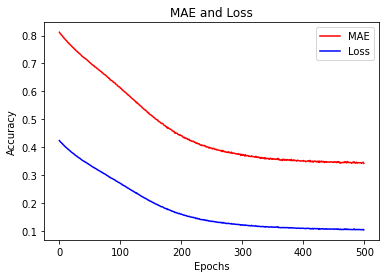

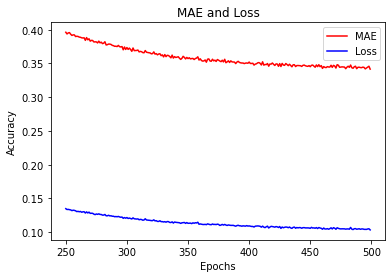

<Figure size 432x288 with 0 Axes>

In [92]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae = history.history['mae']
loss = history.history['loss']

epochs = range(len(loss))  # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[250:]
mae_zoom = mae[250:]
loss_zoom = loss[250:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [99]:
training_forecast = []
for current_time in range(window_size, split_time):
    training_forecast.append(model.predict(training_set_scaled[current_time - window_size:current_time][np.newaxis]))

In [115]:
testing_forecast = []
for current_time in range(window_size, len(testing_set_scaled)):
    testing_forecast.append(model.predict(testing_set_scaled[current_time - window_size:current_time][np.newaxis]))

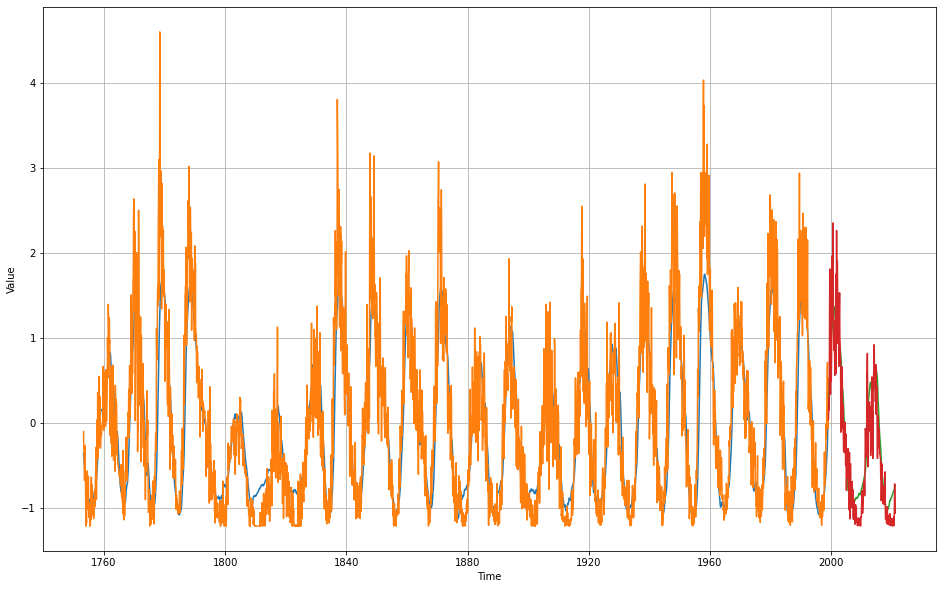

In [116]:
training_results = np.array(training_forecast)[:, 0, 0]
training_reference = training_set_scaled[window_size:].reshape(training_results.shape)

testing_results = np.array(testing_forecast)[:, 0, 0]
testing_reference = testing_set_scaled[window_size:].reshape(testing_results.shape)

plot_series(training_time[window_size:], training_results)
plot_series(training_time[window_size:], training_reference)

plot_series(testing_time[window_size:], testing_results)
plot_series(testing_time[window_size:], testing_reference)

In [117]:
tf.keras.metrics.mean_absolute_error(testing_results, testing_reference).numpy()

0.279029003766076